<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-5" data-toc-modified-id="Problem-5-1">Problem 5</a></span><ul class="toc-item"><li><span><a href="#5a-c" data-toc-modified-id="5a-c-1.1">5a-c</a></span></li><li><span><a href="#5d" data-toc-modified-id="5d-1.2">5d</a></span></li></ul></li><li><span><a href="#Problem-6" data-toc-modified-id="Problem-6-2">Problem 6</a></span><ul class="toc-item"><li><span><a href="#6a" data-toc-modified-id="6a-2.1">6a</a></span></li></ul></li><li><span><a href="#Problem-7" data-toc-modified-id="Problem-7-3">Problem 7</a></span><ul class="toc-item"><li><span><a href="#7a-c" data-toc-modified-id="7a-c-3.1">7a-c</a></span></li><li><span><a href="#7d-e" data-toc-modified-id="7d-e-3.2">7d-e</a></span></li></ul></li><li><span><a href="#Problem-8" data-toc-modified-id="Problem-8-4">Problem 8</a></span><ul class="toc-item"><li><span><a href="#8a" data-toc-modified-id="8a-4.1">8a</a></span></li><li><span><a href="#8b" data-toc-modified-id="8b-4.2">8b</a></span></li><li><span><a href="#8c" data-toc-modified-id="8c-4.3">8c</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2)
%matplotlib notebook

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, accuracy_score, precision_score, recall_score, classification_report, precision_recall_curve, mean_squared_error, r2_score

## Problem 5

### 5a-c

In [11]:
default = pd.read_csv('Default.csv', index_col=0)
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [63]:
X = default.loc[:, ['income', 'balance']].values
y = pd.get_dummies(default['default']).iloc[:, 1].values
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, train_size=0.5, random_state=i)
    logreg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Error rate: {}'.format(1 - accuracy_score(y_test, y_pred)))

Error rate: 0.029000000000000026
Error rate: 0.032200000000000006
Error rate: 0.031200000000000006
Error rate: 0.03400000000000003
Error rate: 0.023800000000000043


### 5d

In [62]:
X = default.loc[:, ['income', 'balance']].values
X = np.append(X, pd.get_dummies(default['student']).iloc[:, 1].values.reshape(-1, 1), axis=1)
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, train_size=0.5, random_state=i)
    logreg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Error rate: {}'.format(1 - accuracy_score(y_test, y_pred)))

Error rate: 0.035599999999999965
Error rate: 0.032200000000000006
Error rate: 0.03200000000000003
Error rate: 0.03400000000000003
Error rate: 0.024599999999999955


## Problem 6

### 6a

In [81]:
X = default.loc[:, ['income', 'balance']].values
logreg = LogisticRegression(solver='lbfgs').fit(X, y)

In [93]:
from scipy.stats import norm, t
V = np.diagflat(np.product(logreg.predict_proba(X), axis = 1))
X_design = np.hstack([np.ones((len(X), 1)), X])
betahat_covmat = np.matrix(np.matmul(np.matmul(X_design.T, V), X_design)).I
betahat_se = np.sqrt(betahat_covmat.diagonal())
summary = pd.DataFrame({'coef': np.append(logreg.intercept_, logreg.coef_),
                        'se': np.asarray(betahat_se)[0]})
summary['z'] = summary.coef / summary.se
summary['p-value'] = 2 * (1 - norm.cdf(abs(summary.z)))
summary.index = np.append('(intercept)', ['income', 'balance'])
summary

,coef,se,z,p-value
(intercept),-11.540478,0.434772,-26.543726,0.00000
income,0.000021,0.000005,4.174162,0.00003
balance,0.005647,0.000227,24.835409,0.00000


In [148]:
from sklearn.utils import resample
coef = []
for i in range(100):
    df = resample(default)
    X = df.loc[:, ['income', 'balance']].values
    y = pd.get_dummies(df['default']).iloc[:, 1].values
    logreg = LogisticRegression(solver='lbfgs').fit(X, y)
    coef.append(np.append(logreg.intercept_, logreg.coef_))

In [150]:
import math
pd.DataFrame({'mean': pd.DataFrame(coef).apply(np.mean),
              'se': pd.DataFrame(coef).apply(np.std) / math.sqrt(default.shape[0])})

,mean,se
0,-4.292077,5.607222e-02
1,-0.000072,7.115373e-07
2,0.002360,2.539542e-05


## Problem 7

In [151]:
weekly = pd.read_csv('Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### 7a-c

In [160]:
X = weekly.loc[:, ['Lag1', 'Lag2']].values
y = pd.get_dummies(weekly['Direction']).iloc[:, 1].values
logreg_all = LogisticRegression(solver='lbfgs').fit(X, y)
logreg_m1 = LogisticRegression(solver='lbfgs').fit(X[1:], y[1:])

In [173]:
print('Probabilities (down, up): {}'.format(logreg_m1.predict_proba([X[0]])))
print('y = {}'.format(y[0]))

Probabilities (down, up): [[0.43 0.57]]
y = 0


This represents an incorrect prediction of "up" when it's actually "down" for the first row.

### 7d-e

In [194]:
preds = []
X = weekly.loc[:, ['Lag1', 'Lag2']].values
y = pd.get_dummies(weekly['Direction']).iloc[:, 1].values
for i in range(len(weekly)):
    X_loo = np.delete(X, i, 0)
    y_loo = np.delete(y, i, 0)
    logreg_loo = LogisticRegression(solver='lbfgs').fit(X_loo, y_loo)
    preds.append(logreg_loo.predict([X[i]])[0] == y[i])
print('Error: {}'.format(1 - np.mean(preds)))

Error: 0.4499540863177227


LOOCV does very poorly. Not that dataset-wide logistic regression and testing on training set is any better:

In [200]:
1 - np.mean(logreg_all.predict(X) == y)

0.44536271808999084

## Problem 8

### 8a

In [276]:
X = np.random.normal(size=100).reshape(-1, 1)
y = x - 2*X.flatten()**2 + np.random.normal(size=100)

### 8b

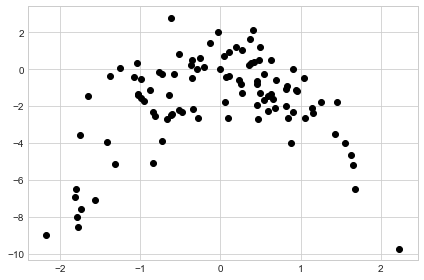

In [277]:
plt.style.use('seaborn-whitegrid')
plt.scatter(X.flatten(), y,  color='black')
plt.tight_layout()

### 8c

In [287]:
from sklearn.model_selection import LeaveOneOut

def loocv_linreg_err(X_design):
    preds = []
    for train_index, test_index in LeaveOneOut().split(X_design):
        X_train, X_test, y_train, y_test = X_design[train_index], X_design[test_index], y[train_index], y[test_index]
        linreg = LinearRegression().fit(X_train, y_train)
        preds.append(linreg.predict(X_test)[0])
    return 1 - np.sum((y - preds) ** 2) / np.sum((y - np.mean(y)) ** 2)

# (i) Y = b0 + b1X + e
print('(i): R2 = {}'.format(loocv_linreg_err(X)))

# (ii) Y = b0 + b1X + b2X^2 + e
X_design = np.append(X, X ** 2, axis = 1)
print('(ii): R2 = {}'.format(loocv_linreg_err(X_design)))

# (iii) Y = b0 + b1X + b2X^2 + b3X^3 + e
X_design = np.append(X_design, X ** 3, axis = 1)
print('(iii): R2 = {}'.format(loocv_linreg_err(X_design)))

# (iv) Y = b0 + b1X + b2X^2 + b4X^4 + e
X_design = np.append(X_design, X ** 4, axis = 1)
print('(iv): R2 = {}'.format(loocv_linreg_err(X_design)))

(i): R2 = -0.03979546602887707
(ii): R2 = 0.6204748351962674
(iii): R2 = 0.6132102226934383
(iv): R2 = 0.6114851743809828
